In [1]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# My data is in google drive.
train_dir =r"C:\Users\Sravanthi\OneDrive\Desktop\archive (3)\NEU Metal Surface Defects Data\train"

In [4]:
# function to get count of images
def get_files(directory):
    if not os.path.exists(directory):
        return 0
    count=0
    for current_path,dirs,files in os.walk(directory):
        for dr in dirs:
            count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
    return count    

In [5]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
print(num_classes,"Classes")
print(train_samples,"Train images")

6 Classes
1656 Train images


In [6]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 1656 images belonging to 6 classes.


In [8]:
# The name of the 12 diseases.
train_generator.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

In [9]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 84, 84, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 41, 41, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 64)        0

In [10]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


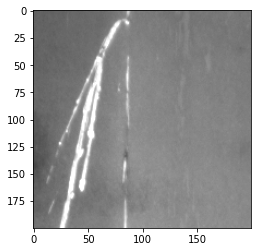

In [12]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img(r"C:\Users\Sravanthi\OneDrive\Desktop\archive (3)\NEU Metal Surface Defects Data\train\Scratches\Sc_7.bmp")
plt.imshow(img1);

#preprocess image
img1 = image.load_img(r"C:\Users\Sravanthi\OneDrive\Desktop\archive (3)\NEU Metal Surface Defects Data\train\Scratches\Sc_7.bmp", target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [13]:
from keras.models import Model
model.summary()

conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_1_output = Model(inputs=model.input, outputs=model.get_layer('max_pooling2d').output)
conv2d_2_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
max_pooling2d_2_output = Model(inputs=model.input, outputs=model.get_layer('max_pooling2d_1').output)
conv2d_3_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_2').output)
max_pooling2d_3_output = Model(inputs=model.input, outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input, outputs=model.get_layer('flatten').output)


conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 84, 84, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 41, 41, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 64)        0

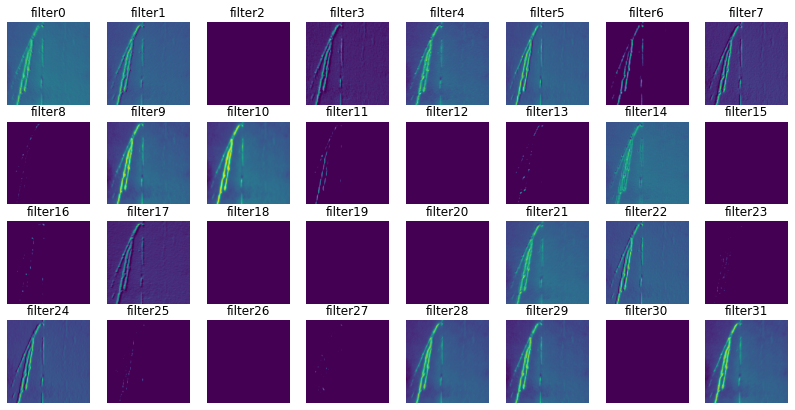

In [14]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

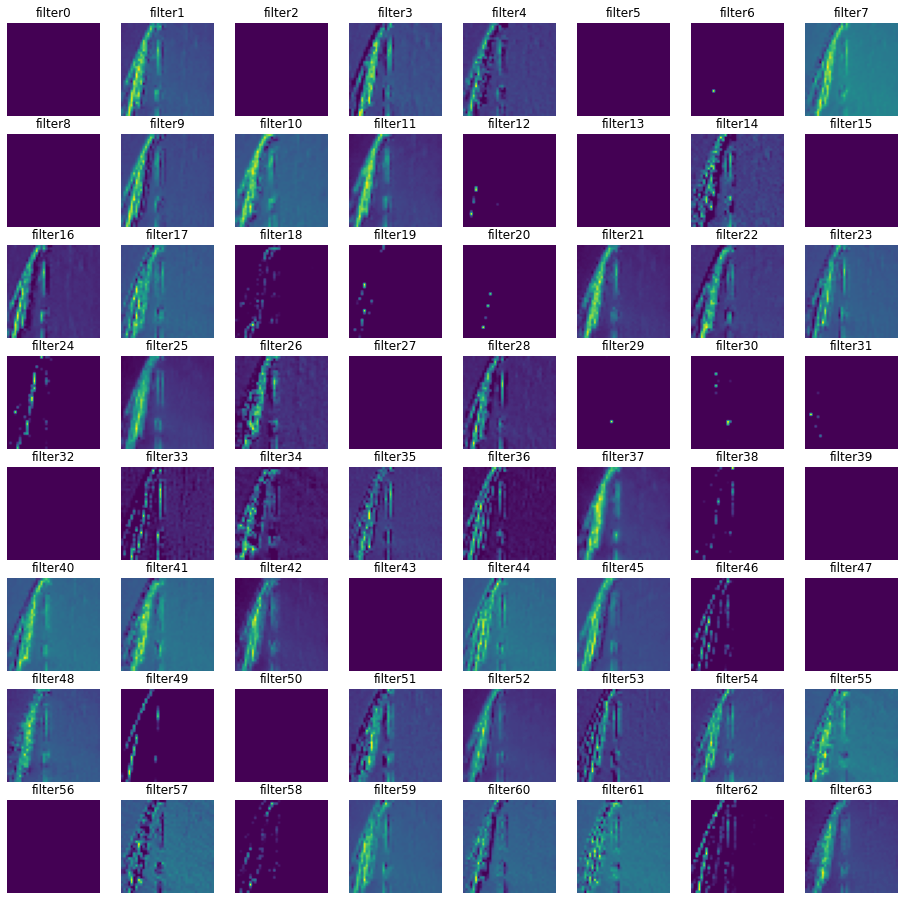

In [15]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

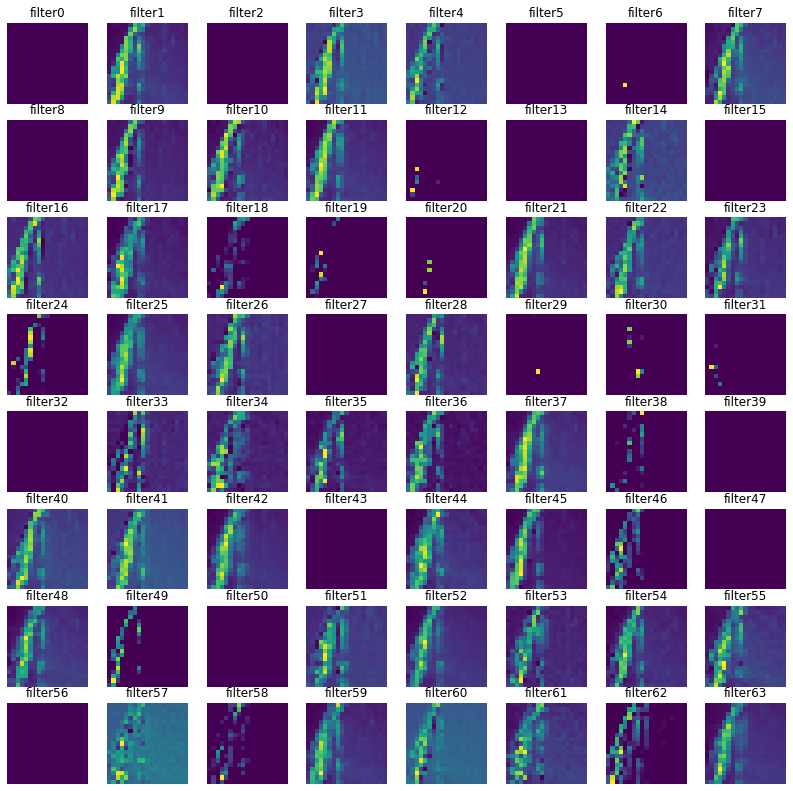

In [16]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

In [17]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 1656 images belonging to 6 classes.


In [18]:
import tensorflow as tf
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs= 10,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples// batch_size,verbose=1)

Epoch 1/10
51/51 [==============================] - 60s 1s/step - loss: 1.6630 - accuracy: 0.2648 - val_loss: 1.2223 - val_accuracy: 0.5123
Epoch 2/10
51/51 [==============================] - 45s 892ms/step - loss: 1.0649 - accuracy: 0.5560 - val_loss: 0.8842 - val_accuracy: 0.6342
Epoch 3/10
51/51 [==============================] - 46s 895ms/step - loss: 0.9972 - accuracy: 0.6084 - val_loss: 0.5903 - val_accuracy: 0.7733
Epoch 4/10
51/51 [==============================] - 46s 907ms/step - loss: 0.8796 - accuracy: 0.6860 - val_loss: 0.7530 - val_accuracy: 0.6716
Epoch 5/10
51/51 [==============================] - 47s 915ms/step - loss: 0.6360 - accuracy: 0.7771 - val_loss: 0.3908 - val_accuracy: 0.8909
Epoch 6/10
51/51 [==============================] - 47s 932ms/step - loss: 0.4136 - accuracy: 0.8516 - val_loss: 0.3721 - val_accuracy: 0.8615
Epoch 7/10
51/51 [==============================] - 47s 916ms/step - loss: 0.4053 - accuracy: 0.8585 - val_loss: 0.3016 - val_accuracy: 0.8995
Ep

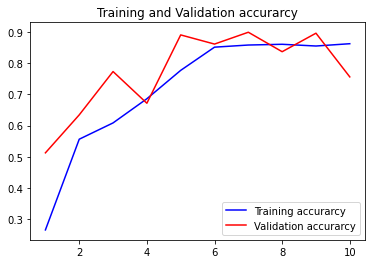

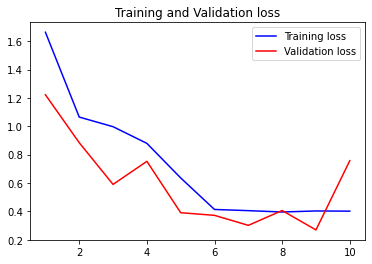

In [21]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(accuracy) + 1)

#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing import image

# ... (previous code for training and plotting accuracy/loss)

# Assuming 'model' is your trained model

# Function to get predictions and true labels
def get_predictions_and_labels(generator):
    predictions = []
    true_labels = []

    for _ in range(generator.samples // generator.batch_size):
        images, labels = generator.next()
        predictions.extend(np.argmax(model.predict(images), axis=1))
        true_labels.extend(np.argmax(labels, axis=1))

    return np.array(predictions), np.array(true_labels)

# Assuming you have a validation_generator defined
validation_accuracy.reset()
predictions, true_labels = get_predictions_and_labels(validation_generator)

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display classification report
print("Classification Report:")
print(classification_report(true_labels, predictions))

# Optionally, visualize the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()


NameError: name 'validation_accuracy' is not defined

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the path to your test data directory
test_directory = r"C:\Users\Sravanthi\OneDrive\Desktop\archive (3)\NEU Metal Surface Defects Data\test"

# Specify the width and height of your input images
image_width = 256  # Replace with the actual width
image_height = 256  # Replace with the actual height

# Create an instance of ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # You can adjust preprocessing as needed

# Create a test generator using flow_from_directory or flow_from_dataframe, depending on your dataset structure
test_generator = test_datagen.flow_from_directory(
    test_directory,  # Path to the test dataset directory
    target_size=(image_width, image_height),  # Size of the input images
    batch_size=batch_size,  # Batch size
    class_mode='categorical'  # Classification type (e.g., 'categorical' for multiclass)
)
# Assuming you have already loaded or defined your model (model) somewhere in your code

# Evaluate the model on the test data

score,accuracy = model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

Found 72 images belonging to 6 classes.
3/3 [==============================] - 1s 306ms/step - loss: 0.7586 - accuracy: 0.7361
Test score is 0.7585842609405518
Test accuracy is 0.7361111044883728


In [24]:
# Save entire model with optimizer, architecture, weights and training configuration.
from tensorflow.keras.models import load_model
model.save('scratch.h5')
loaded_model = load_model('scratch.h5')

In [25]:
# Save model weights.
from tensorflow.keras.models import load_model
model.save_weights('scratch_weights.h5')
model.load_weights('scratch_weights.h5')

In [26]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

In [27]:
# Loading model and predict.
from tensorflow.keras.models import load_model
model=load_model('scratch.h5')

Classes = ["pitted","rolled","scratches","crazing","inclusion","patches"]


1/1 [==============================] - 0s 25ms/step
Predicted class: scratches

Class Probabilities:
crazing: 0.00
inclusion: 0.00
patches: 0.00
pitted: 0.00
rolled: 0.00
scratches: 1.00


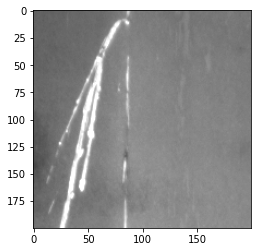

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Set the image width and height
img_width = 256
img_height = 256

# Prepare the image using Keras preprocessing
from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

# Define the class mapping
class_mapping = {
    0: "crazing",
    1: "inclusion",
    2: "patches",
    3: "pitted",
    4: "rolled",
    5: "scratches"
}

# Predict the class of the input image
result = model.predict([prepare(r"C:\Users\Sravanthi\OneDrive\Desktop\archive (3)\NEU Metal Surface Defects Data\train\Scratches\Sc_7.bmp")])

# Load and display the input image
defect = image.load_img(r"C:\Users\Sravanthi\OneDrive\Desktop\archive (3)\NEU Metal Surface Defects Data\train\Scratches\Sc_7.bmp")
plt.imshow(defect)

# Find the index of the class with the highest probability
predicted_class_index = np.argmax(result)

# Map the index to the corresponding class label
predicted_class_label = class_mapping.get(predicted_class_index, "Unknown")
print(f"Predicted class: {predicted_class_label}")

# Print the class probabilities
print("\nClass Probabilities:")
for class_index, class_probability in enumerate(result[0]):
    class_label = class_mapping.get(class_index, "Unknown")
    print(f"{class_label}: {class_probability:.2f}")


In [30]:
import tensorflow as tf

# Load your Keras model from the .h5 file
model = tf.keras.models.load_model('scratch.h5')

# Convert the Keras model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open("output.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\SRAVAN~1\AppData\Local\Temp\tmpta94w96c\assets


INFO:tensorflow:Assets written to: C:\Users\SRAVAN~1\AppData\Local\Temp\tmpta94w96c\assets


In [31]:
import tensorflow as tf

# Load your Keras model from the .h5 file
model = tf.keras.models.load_model('scratch.h5')

# Convert the Keras model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Set the optimization options
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model using the updated optimization options
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open("model_opt.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\SRAVAN~1\AppData\Local\Temp\tmp2y393xes\assets


INFO:tensorflow:Assets written to: C:\Users\SRAVAN~1\AppData\Local\Temp\tmp2y393xes\assets


1/1 [==============================] - 0s 32ms/step
Predicted class: scratches
Class Probabilities:
crazing: 0.00
inclusion: 0.00
patches: 0.00
pitted: 0.00
rolled: 0.00
scratches: 1.00


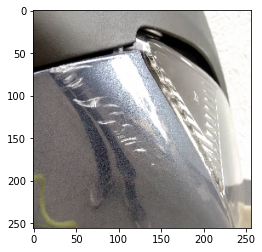

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from keras.preprocessing import image

# Pre-Processing test data same as train data.
img_width = 256
img_height = 256
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

def prepare_image_from_url(image_url):
    response = requests.get(image_url)
    
    if response.status_code == 200:
        img = image.load_img(BytesIO(response.content), target_size=(img_width, img_height))
        x = image.img_to_array(img)
        x = x / 255
        return np.expand_dims(x, axis=0)
    else:
        raise Exception(f"Failed to download image from URL: {image_url}")

# Sample class mapping (replace with your actual class mapping)
class_mapping = {
    0: "crazing",
    1: "inclusion",
    2: "patches",
    3: "pitted",
    4: "rolled",
    5: "scratches"
    # Define your class mapping here
}

image_url = "https://i.stack.imgur.com/pAqss.jpg"

try:
    prepared_image = prepare_image_from_url(image_url)
    result = model.predict(prepared_image)

    # Find the index of the class with the highest probability
    predicted_class_index = np.argmax(result)

    # Map the index to the corresponding class label
    predicted_class_label = class_mapping.get(predicted_class_index, "Unknown")
    print(f"Predicted class: {predicted_class_label}")

    # Print the class probabilities
    print("Class Probabilities:")
    for class_index, class_probability in enumerate(result[0]):
        class_label = class_mapping.get(class_index, "Unknown")
        print(f"{class_label}: {class_probability:.2f}")

    # Display the image
    plt.imshow(prepared_image[0])
    plt.show()

except Exception as e:
    print(f"Error: {e}")



In [34]:
import cv2
import numpy as np

# Load the image (replace 'image_path.jpg' with your image)
image = cv2.imread("C:\\Users\\Sravanthi\\Downloads\\cnn scratch.jpg")

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, 50, 200)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to store the area of scratches
scratch_area = 10

# Initialize variables to store true positives (TP) and false positives (FP)
true_positives = 0
false_positives = 0

# Calculate the total area of the image
total_area = image.shape[0] * image.shape[1]

# Define a threshold to determine if a contour is a scratch (you may need to adjust this)
min_scratch_area = 50 # Adjust as needed

# Iterate through detected contours
for contour in contours:
    # Calculate the area of each contour
    area = cv2.contourArea(contour)
    
    # Check if the contour area is below the threshold (considered a scratch)
    if area < min_scratch_area:
        scratch_area += area
        
        # Draw a bounding box around the scratch
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Assuming this is a true positive (you may need additional checks here)
        true_positives += 1
    else:
        # Assuming this is a false positive
        false_positives += 1

# Calculate the accuracy of the detection
accuracy = (true_positives / (true_positives + false_positives)) * 100

# Display the accuracy on the image
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, f"Accuracy: {accuracy:.2f}%", (10, 30), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

# Display the original image with contours and accuracy
cv2.imshow('Image with Accuracy', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix



In [100]:
# Create a synthetic dataset
# You should replace this with your actual dataset
data = {
    'Damage_Type': ['Scratches', 'Dents', 'Scratches', 'Dents', 'Scratches', 'Dents', 'Dents', 'Scratches', 'Dents', 'Scratches',
                    'Scratches', 'Dents', 'Scratches', 'Dents', 'Scratches', 'Dents', 'Scratches', 'Dents', 'Scratches', 'Dents'],
    'Damage_Severity': ['Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Medium', 'Low', 'High',
                        'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low'],
    'Age_of_Bike': [2, 3, 1, 4, 2, 5, 3, 1, 2, 4, 1, 3, 2, 4, 3, 1, 5, 2, 3, 1],
    'Mileage': [5000, 8000, 3000, 12000, 6000, 15000, 9000, 4000, 7000, 11000, 3500, 9500, 5500, 10000, 7500, 3200, 13000, 6800, 9200, 3800],
    'Weather_Condition': ['Clear', 'Rain', 'Clear', 'Snow', 'Clear', 'Rain', 'Clear', 'Snow', 'Rain', 'Clear', 'Rain', 'Clear', 'Snow',
                          'Clear', 'Rain', 'Clear', 'Snow', 'Rain', 'Clear', 'Rain'],
    'Repair_Cost': [100, 200, 150, 250, 120, 300, 180, 130, 250, 160, 110, 190, 140, 200, 170, 120, 220, 240, 180, 130]
}

df = pd.DataFrame(data)


In [45]:
# Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Loading Train dataset:
train_data = pd.read_csv("C:\\Users\\Sravanthi\\Downloads\\Book1.csv")
# Top 5 records:
train_data.head()

,DamageType,Damage severity,Age of bike,Mileage,Repair cost
0,NaN,NaN,NaN,NaN,NaN
1,Scratches | Low | 2 ...,Low,2.0,5000.0,100.0
2,Dents | Medium | 3 ...,Medium,3.0,8000.0,200.0
3,Scratches | High | 1 ...,High,1.0,3000.0,150.0
4,Dents | Low | 4 ...,Low,4.0,12000.0,250.0


In [47]:
# Shape of dataset:
train_data.shape

(21, 5)

In [48]:
train_data.isnull().sum()

 DamageType        1
Damage severity    1
Age of bike        1
Mileage            1
Repair cost        1
dtype: int64

In [49]:
# Insights of dataset:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0    DamageType      20 non-null     object 
 1   Damage severity  20 non-null     object 
 2   Age of bike      20 non-null     float64
 3   Mileage          20 non-null     float64
 4   Repair cost      20 non-null     float64
dtypes: float64(3), object(2)
memory usage: 968.0+ bytes


In [50]:
# Description of dataset (Numerical):
train_data.describe()

,Age of bike,Mileage,Repair cost
count,20.000000,20.000000,20.000000
mean,2.600000,12100.000000,177.000000
std,1.313893,20970.355015,54.589376
min,1.000000,3000.000000,100.000000
25%,1.750000,4750.000000,130.000000
50%,2.500000,7250.000000,175.000000
75%,3.250000,9875.000000,205.000000
max,5.000000,100000.000000,300.000000


In [51]:
# Description of dataset (Categorical):
train_data.describe(include=['O'])

,DamageType,Damage severity
count,20,20
unique,20,3
top,Scratches | Low | 2 ...,Low
freq,1,8


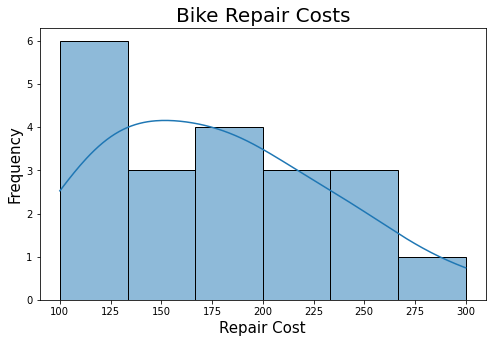

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column 'Repair_Cost'
# Replace 'df' and 'Repair_Cost' with your actual DataFrame and column name

# Histrogram of Bike Repair Costs:
plt.figure(figsize=(8, 5))
sns.histplot(df['Repair_Cost'], kde=True)
plt.title('Bike Repair Costs', fontsize=20)
plt.xlabel('Repair Cost', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


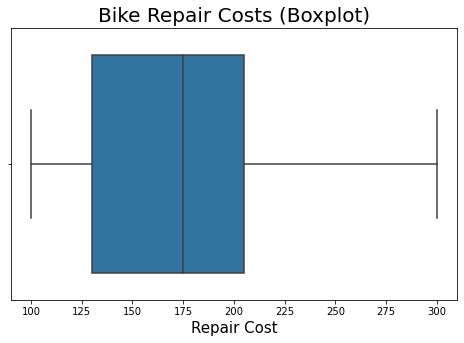

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column 'Repair_Cost'
# Replace 'df' and 'Repair_Cost' with your actual DataFrame and column name

# Boxplot of Bike Repair Costs:
plt.figure(figsize=(8, 5))
sns.boxplot(df['Repair_Cost'])
plt.title('Bike Repair Costs (Boxplot)', fontsize=20)
plt.xlabel('Repair Cost', fontsize=15)
plt.show()


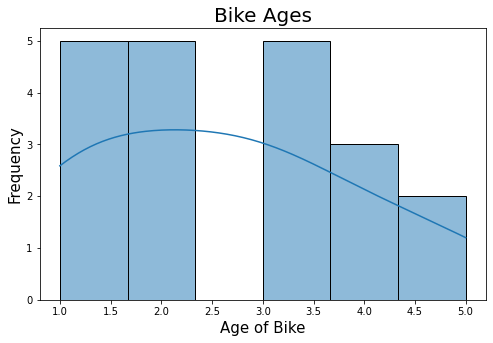

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Histogram of Bike Ages:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age_of_Bike'], kde=True)
plt.title('Bike Ages', fontsize=20)
plt.xlabel('Age of Bike', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

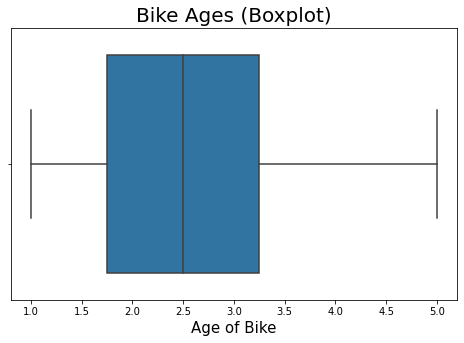

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column 'Age_of_Bike'
# Replace 'df' and 'Age_of_Bike' with your actual DataFrame and column name

# Boxplot of Bike Ages:
plt.figure(figsize=(8, 5))
sns.boxplot(df['Age_of_Bike'])
plt.title('Bike Ages (Boxplot)', fontsize=20)
plt.xlabel('Age of Bike', fontsize=15)
plt.show()


In [68]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.feature_selection import RFE
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 


In [69]:
bikes_data = pd.read_csv("C:\\Users\\Sravanthi\\Downloads\\Book1.csv")
bikes_data.head()

,DamageType,Damage severity,Age of bike,Mileage,Repair cost
0,NaN,NaN,NaN,NaN,NaN
1,Scratches | Low | 2 ...,Low,2.0,5000.0,100.0
2,Dents | Medium | 3 ...,Medium,3.0,8000.0,200.0
3,Scratches | High | 1 ...,High,1.0,3000.0,150.0
4,Dents | Low | 4 ...,Low,4.0,12000.0,250.0


In [70]:
#shape of the data
bikes_data.shape

(21, 5)

In [71]:
#info the dataframe
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0    DamageType      20 non-null     object 
 1   Damage severity  20 non-null     object 
 2   Age of bike      20 non-null     float64
 3   Mileage          20 non-null     float64
 4   Repair cost      20 non-null     float64
dtypes: float64(3), object(2)
memory usage: 968.0+ bytes


In [72]:
#describe the data
bikes_data.describe()

,Age of bike,Mileage,Repair cost
count,20.000000,20.000000,20.000000
mean,2.600000,12100.000000,177.000000
std,1.313893,20970.355015,54.589376
min,1.000000,3000.000000,100.000000
25%,1.750000,4750.000000,130.000000
50%,2.500000,7250.000000,175.000000
75%,3.250000,9875.000000,205.000000
max,5.000000,100000.000000,300.000000


In [77]:
columns_to_check = [' DamageType  ', 'Damage severity', 'Age of bike', 'Mileage', 'Repair cost']
bikes_data.duplicated(subset=columns_to_check).sum()



0

In [79]:
bikes_data.isnull().sum()

 DamageType        1
Damage severity    1
Age of bike        1
Mileage            1
Repair cost        1
dtype: int64

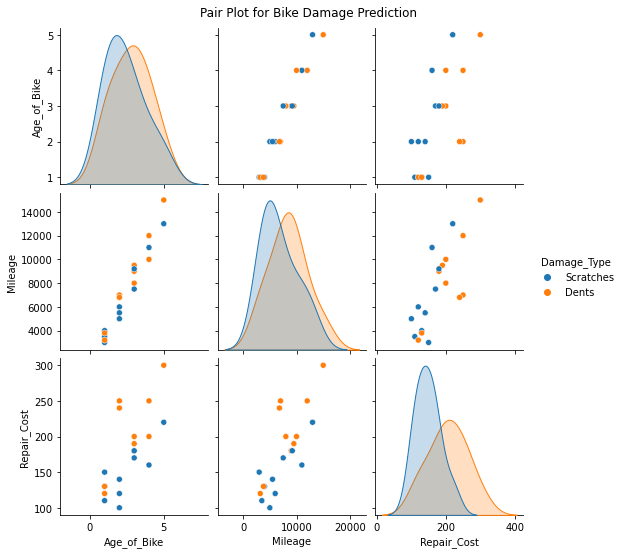

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the specified columns
# Replace 'df' and column names with your actual DataFrame and column names

# Pair plot for bike damage prediction
sns.pairplot(df, hue='Damage_Type')
plt.suptitle('Pair Plot for Bike Damage Prediction', y=1.02)
plt.show()


In [87]:
#explore Column CarName
bikes_data['Damage severity'].value_counts()

Low       8
Medium    6
High      6
Name: Damage severity, dtype: int64

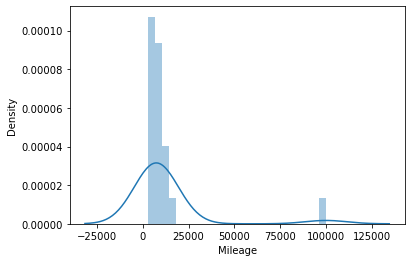

In [90]:
bikes_data['Mileage'].value_counts().head()
sns.distplot(bikes_data['Mileage'])
plt.show()

In [92]:
bikes_numeric = bikes_data.select_dtypes(include =['int64','float64'])
bikes_numeric.head()

,Age of bike,Mileage,Repair cost
0,NaN,NaN,NaN
1,2.0,5000.0,100.0
2,3.0,8000.0,200.0
3,1.0,3000.0,150.0
4,4.0,12000.0,250.0


<Figure size 2160x2160 with 0 Axes>

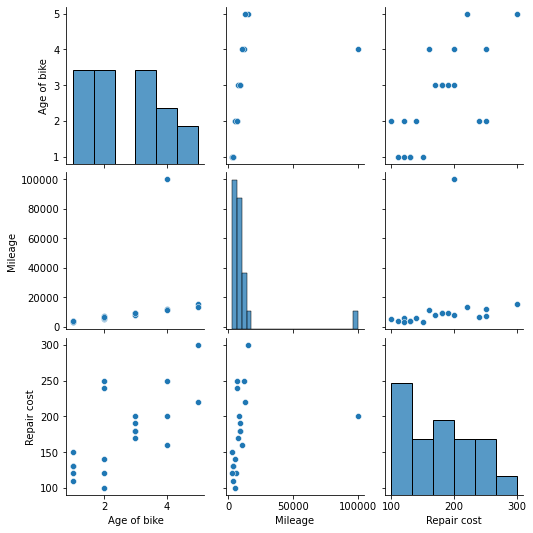

In [93]:
plt.figure(figsize = (30,30))
sns.pairplot(bikes_numeric)
plt.show()

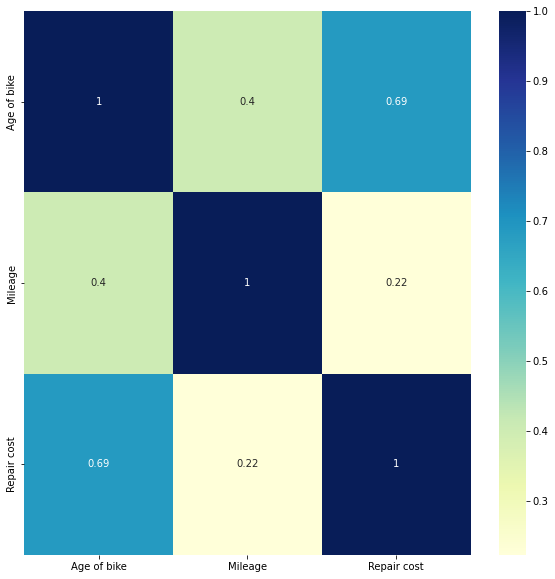

In [99]:
plt.figure(figsize = (10,10))
sns.heatmap(bikes_data.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()